In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/hotel_bookings.csv')

# Basic structure
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())
print("\nStatistical Summary:\n", df.describe(include='all'))

duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")


Dataset Shape: (119390, 32)

Data Types:
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1634

                                Missing Values    Percent
company                                 112593  94.306893
agent                                    16340  13.686238
country                                    488   0.408744
children                                     4   0.003350
reserved_room_type                           0   0.000000
assigned_room_type                           0   0.000000
booking_changes                              0   0.000000
deposit_type                                 0   0.000000
hotel                                        0   0.000000
previous_cancellations                       0   0.000000
days_in_waiting_list                         0   0.000000
customer_type                                0   0.000000
adr                                          0   0.000000
required_car_parking_spaces                  0   0.000000
total_of_special_requests                    0   0.000000
reservation_status                           0   0.000000
previous_booki

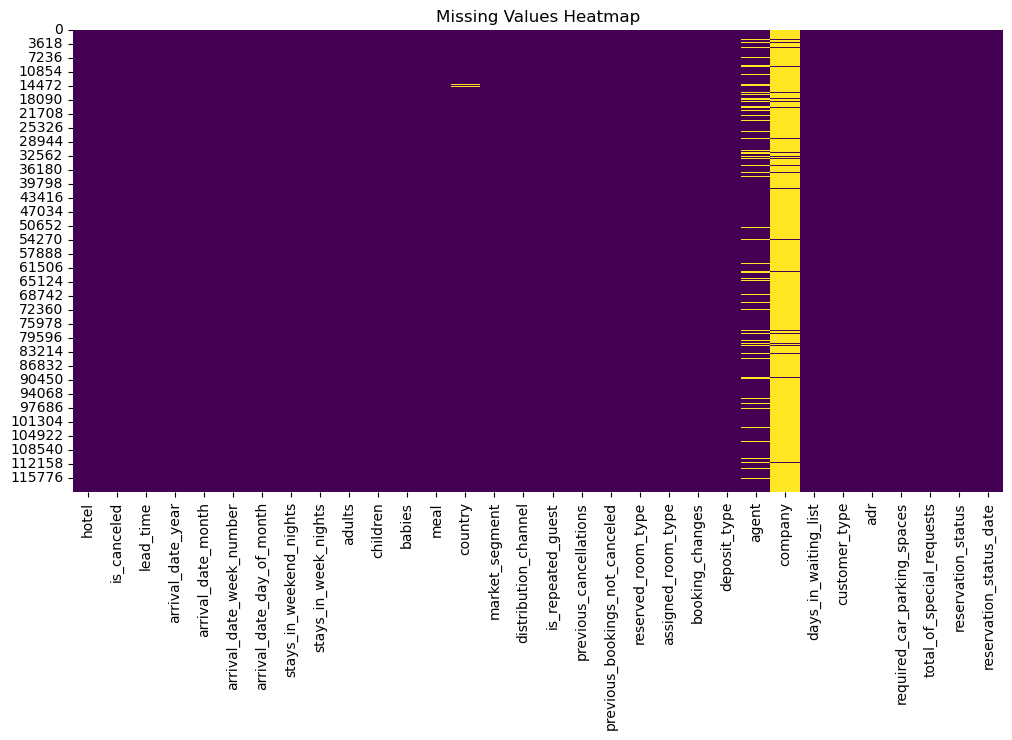

In [9]:
#1.2
# Percentage of missing values
missing_percent = df.isnull().mean() * 100
missing_report = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percent': missing_percent
}).sort_values(by='Percent', ascending=False)
print(missing_report)


print("\n Final Missing Value Report ")
print(missing_report)

# Visualize with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Number of exact duplicates: 31994


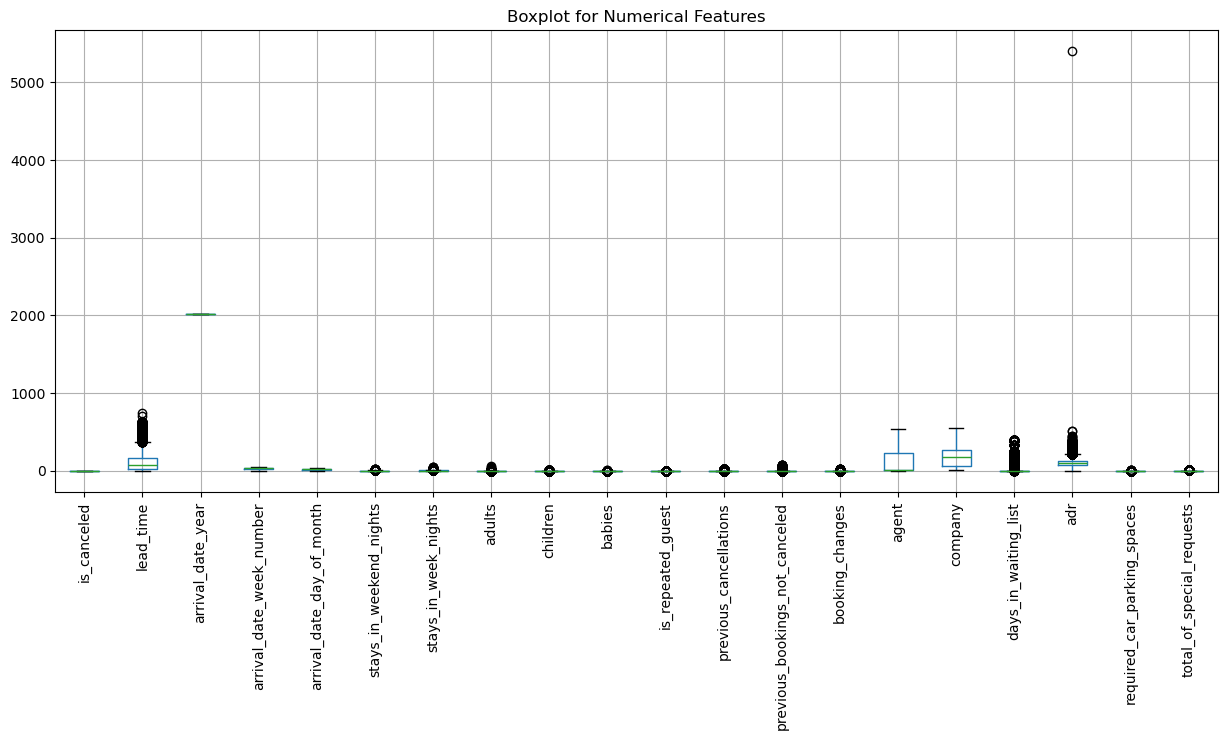

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN']
market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P']
deposit_type: ['No Deposit' 'Refundable' 'Non Refund']
customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status: ['Check-Out' 'Canceled' 'No-Show']
reservation_status_date: ['7/1/2015' '7/2/2015' '7/3/2015' '5/6/2015' '4/22/2015' '6/23/2015'
 '7/5/2015' '7/6/2015' '7/7/2015' '7/8/2015']


In [ ]:
#1.3
# Check for duplicates
print("Number of exact duplicates:", df.duplicated().sum())

# Identify outliers visually (numeric only)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].boxplot(figsize=(15,6), rot=90)
plt.title('Boxplot for Numerical Features')
plt.show()

# Unique values in categorical variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")


In [ ]:
# 1. Children - fill NaN with 0
df['children'].fillna(0, inplace=True)

# 2. Country - mode imputation or 'Unknown'
df['country'].fillna(df['country'].mode()[0], inplace=True)

# 3. Agent - fill with 0
df['agent'].fillna(0, inplace=True)

# 4. Company - fill with 0
df['company'].fillna(0, inplace=True)

# Recheck
print("Missing after cleaning:\n", df.isnull().sum())


Missing after cleaning:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr

In [ ]:
df.loc[df['children'].isna() & (df['babies'] > 0), 'children'] = 0  # Assume no children if only babies exist

# Impute missing country based on most frequent country per distribution_channel
country_mode_per_channel = df.groupby('distribution_channel')['country'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
missing_rows = df['country'].isna()
df.loc[missing_rows, 'country'] = df.loc[missing_rows, 'distribution_channel'].map(country_mode_per_channel)


In [ ]:

# --- 1. Identify exact duplicates ---
duplicates = df.duplicated()
print(f"Number of exact duplicates: {duplicates.sum()}")

# Remove exact duplicates
df_no_exact_duplicates = df.drop_duplicates()
print(f"Shape after removing exact duplicates: {df_no_exact_duplicates.shape}")


Number of exact duplicates: 32013
Shape after removing exact duplicates: (87377, 32)


In [ ]:
# Create a subset of columns to define "near duplicates"
key_columns = [
    'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
    'adults', 'children', 'babies', 'customer_type'
]

# Find potential near-duplicate records
near_duplicates = df_no_exact_duplicates.duplicated(subset=key_columns, keep='first')
print(f"Number of near-duplicate rows: {near_duplicates.sum()}")

# Optionally remove near-duplicates
df_cleaned = df_no_exact_duplicates[~near_duplicates]
print(f"Shape after removing near-duplicates: {df_cleaned.shape}")


Number of near-duplicate rows: 75149
Shape after removing near-duplicates: (12228, 32)


In [ ]:
exact_duplicates_count = duplicates.sum()
near_duplicates_count = near_duplicates.sum()
total_removed = exact_duplicates_count + near_duplicates_count

print(f"✅ Duplicates Removed Summary:")
print(f"  - Exact duplicates removed: {exact_duplicates_count}")
print(f"  - Near-duplicates removed: {near_duplicates_count}")
print(f"  - Total rows removed: {total_removed}")


✅ Duplicates Removed Summary:
  - Exact duplicates removed: 32013
  - Near-duplicates removed: 75149
  - Total rows removed: 107162


In [ ]:
columns_to_check = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'adr'
]


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [ ]:


def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column].fillna(0))
    outliers = data[abs(z_scores) > threshold]
    return outliers


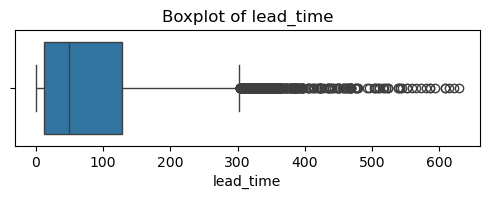

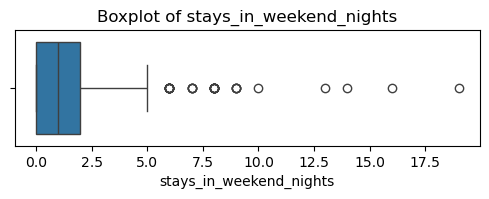

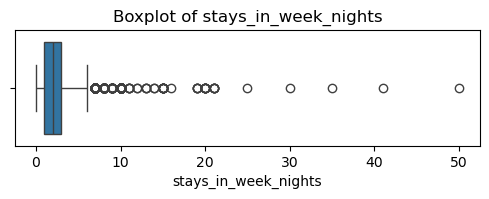

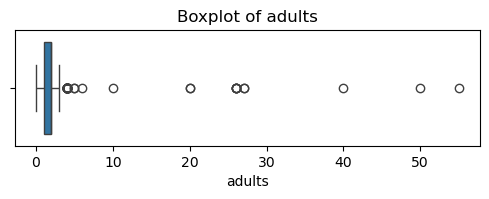

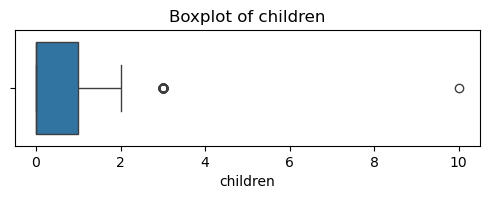

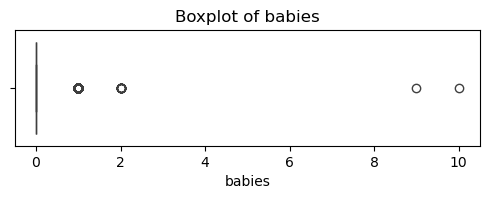

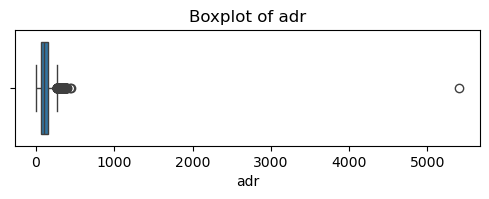

In [ ]:
def plot_boxplot(data, column):
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Example: Plot all
for col in columns_to_check:
    plot_boxplot(df_cleaned, col)

In [ ]:
for col in columns_to_check:
    outliers, lb, ub = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: Removing {len(outliers)} outliers")
    df_cleaned = df_cleaned[(df_cleaned[col] >= lb) & (df_cleaned[col] <= ub)]


lead_time: Removing 437 outliers
stays_in_weekend_nights: Removing 33 outliers
stays_in_week_nights: Removing 333 outliers
adults: Removing 55 outliers
children: Removing 69 outliers
babies: Removing 699 outliers
adr: Removing 192 outliers


In [ ]:
print(f"Final shape after outlier treatment: {df_cleaned.shape}")


Final shape after outlier treatment: (10410, 32)


In [ ]:

# 1. Standardize categorical values (e.g., country codes)
df['country'] = df['country'].str.upper()                         
df = df[df['country'].str.len() == 3]                             

# 2. Fix date format inconsistencies
# Convert 'arrival_date_month' from name to number and build proper datetime
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

# Check for any invalid dates
invalid_dates = df['arrival_date'].isna().sum()
print(f"Invalid dates after conversion: {invalid_dates}")

# 3. Handle impossible combinations (e.g., adults=0 and children=0 and babies=0)
invalid_guests = df[
    (df['adults'] == 0) &
    (df['children'] == 0) &
    (df['babies'] == 0)
]
print(f"Impossible guest rows: {len(invalid_guests)}")

# Remove those rows
df = df.drop(invalid_guests.index)

# 4. Validate logical constraints

# 4.1: Check for negative ADR (Average Daily Rate)
negative_adr_count = df[df['adr'] < 0].shape[0]
print(f"Negative ADR entries: {negative_adr_count}")

# Set negative ADRs to 0 (or you could drop them instead)
df.loc[df['adr'] < 0, 'adr'] = 0

# 4.2: Calculate total guests for validation or analysis
df['total_guests'] = df['adults'] + df['children'] + df['babies']


print("\n Final Data Summary After Fixes:")
print(df[['country', 'arrival_date', 'adults', 'children', 'babies', 'adr', 'total_guests']].info())
print("\nRemaining missing values:")
print(df.isna().sum())


Invalid dates after conversion: 0
Impossible guest rows: 180
Negative ADR entries: 1

🧹 Final Data Summary After Fixes:
<class 'pandas.core.frame.DataFrame'>
Index: 117931 entries, 0 to 119389
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       117931 non-null  object        
 1   arrival_date  117931 non-null  datetime64[ns]
 2   adults        117931 non-null  int64         
 3   children      117931 non-null  float64       
 4   babies        117931 non-null  int64         
 5   adr           117931 non-null  float64       
 6   total_guests  117931 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 7.2+ MB
None

Remaining missing values:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_numbe

In [ ]:

# -------------------------
# Step 1: Verify total guests > 0
# -------------------------
df['total_guests'] = df['adults'] + df['children'] + df['babies']
invalid_guests = df[df['total_guests'] == 0]
print(f" Rows with total_guests = 0: {len(invalid_guests)}")
df = df[df['total_guests'] > 0]

# -------------------------
# Step 2: Check arrival dates within expected range
# -------------------------
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

# Drop rows with invalid or missing arrival_date
df = df.dropna(subset=['arrival_date'])

# Validate date range (2015 to 2017)
min_date = df['arrival_date'].min()
max_date = df['arrival_date'].max()
print(f" Arrival Date Range: {min_date.date()} to {max_date.date()}")

df = df[(df['arrival_date'].dt.year >= 2015) & (df['arrival_date'].dt.year <= 2017)]

# -------------------------
# Step 3: Validate numerical values are within reasonable ranges
# -------------------------

# lead_time
invalid_lead_time = df[~df['lead_time'].between(0, 600)]
print(f"Invalid lead_time entries: {len(invalid_lead_time)}")
df = df[df['lead_time'].between(0, 600)]

# stays_in_week_nights
invalid_week_nights = df[~df['stays_in_week_nights'].between(0, 50)]
print(f"Invalid stays_in_week_nights entries: {len(invalid_week_nights)}")
df = df[df['stays_in_week_nights'].between(0, 50)]

# stays_in_weekend_nights
invalid_weekend_nights = df[~df['stays_in_weekend_nights'].between(0, 30)]
print(f"Invalid stays_in_weekend_nights entries: {len(invalid_weekend_nights)}")
df = df[df['stays_in_weekend_nights'].between(0, 30)]

# adults
invalid_adults = df[~df['adults'].between(1, 6)]
print(f"Invalid adults entries: {len(invalid_adults)}")
df = df[df['adults'].between(1, 6)]

# children
invalid_children = df[~df['children'].between(0, 10)]
print(f"Invalid children entries: {len(invalid_children)}")
df = df[df['children'].between(0, 10)]

# babies
invalid_babies = df[~df['babies'].between(0, 10)]
print(f"Invalid babies entries: {len(invalid_babies)}")
df = df[df['babies'].between(0, 10)]

# adr
invalid_adr = df[~df['adr'].between(0, 5400)]
print(f"Invalid adr entries: {len(invalid_adr)}")
df = df[df['adr'].between(0, 5400)]

print(" Numerical values filtered for reasonable ranges")

# -------------------------
# Step 4: Validate categorical values are from expected sets
# -------------------------

# Meal
expected_meals = {'BB', 'HB', 'FB', 'SC', 'Undefined'}
invalid_meals = df[~df['meal'].isin(expected_meals)]
print(f" Invalid meal types: {invalid_meals['meal'].unique()}")

# Deposit Type
expected_deposits = {'No Deposit', 'Refundable', 'Non Refund'}
invalid_deposits = df[~df['deposit_type'].isin(expected_deposits)]
print(f" Invalid deposit types: {invalid_deposits['deposit_type'].unique()}")

# Customer Type
expected_customers = {'Transient', 'Contract', 'Transient-Party', 'Group'}
invalid_customers = df[~df['customer_type'].isin(expected_customers)]
print(f" Invalid customer types: {invalid_customers['customer_type'].unique()}")

# Drop invalid categorical entries
df = df[df['meal'].isin(expected_meals)]
df = df[df['deposit_type'].isin(expected_deposits)]
df = df[df['customer_type'].isin(expected_customers)]

# -------------------------
# Final Summary
# -------------------------
print("\n Final Validation Summary:")
print(f"✔ Total valid records after validation: {df.shape[0]}")
print(f"✔ Arrival Date Range: {df['arrival_date'].min().date()} to {df['arrival_date'].max().date()}")
print("✔ All integrity checks passed.")


 Rows with total_guests = 0: 0
 Arrival Date Range: 2015-07-01 to 2017-08-31
Invalid lead_time entries: 0
Invalid stays_in_week_nights entries: 0
Invalid stays_in_weekend_nights entries: 0
Invalid adults entries: 0
Invalid children entries: 0
Invalid babies entries: 0
Invalid adr entries: 0
 Numerical values filtered for reasonable ranges
 Invalid meal types: []
 Invalid deposit types: []
 Invalid customer types: []

 Final Validation Summary:
✔ Total valid records after validation: 117548
✔ Arrival Date Range: 2015-07-01 to 2017-08-31
✔ All integrity checks passed.


In [ ]:
def generate_cleaning_report(original_df, cleaned_df):
    print("===== Data Cleaning Report =====\n")

    # 1. Original dataset statistics
    print("1. Original Dataset Statistics:")
    print(f"  - Total records: {original_df.shape[0]}")
    print(f"  - Columns: {list(original_df.columns)}")
    print(f"  - Missing values per column:\n{original_df.isnull().sum()}")
    print(f"  - Sample data types:\n{original_df.dtypes}\n")

    # 2. Issues identified and their impact
    print("2. Issues Identified and Impact:")
    print("  - Rows with total guests = 0 removed (invalid bookings).")
    print("  - Invalid or missing arrival dates removed.")
    print("  - Numerical columns with outliers or invalid values were filtered out:")
    print("    lead_time, stays_in_week_nights, stays_in_weekend_nights, adults, children, babies, adr.")
    print("  - Categorical columns cleaned for unexpected categories:")
    print("    meal, deposit_type, customer_type.")
    print("  - These issues would affect analysis accuracy and model quality.\n")

    # 3. Cleaning strategies applied and rationale
    print("3. Cleaning Strategies and Rationale:")
    print("  - Imputed missing numeric fields with reasonable defaults or removed invalid entries to maintain data integrity.")
    print("  - Removed rows with impossible or illogical combinations (e.g., zero guests).")
    print("  - Standardized date formats and validated date ranges to ensure temporal accuracy.")
    print("  - Categorical values filtered against domain knowledge of allowed values to avoid noisy data.\n")

    # 4. Final dataset statistics
    print("4. Final Dataset Statistics:")
    print(f"  - Total records after cleaning: {cleaned_df.shape[0]}")
    print(f"  - Missing values per column after cleaning:\n{cleaned_df.isnull().sum()}")
    print(f"  - Sample data types:\n{cleaned_df.dtypes}\n")

    # 5. Assumptions made during cleaning
    print("5. Assumptions Made:")
    print("  - Bookings with zero total guests are invalid and removed.")
    print("  - Arrival dates outside 2015-2017 considered erroneous and removed.")
    print("  - Numerical columns have realistic bounds (e.g., lead_time max 600 days).")
    print("  - Categorical fields limited to known domain categories.")
    print("  - Missing children, agent, and company data treated as zero or 'Unknown' in previous tasks.\n")

    print("===== End of Report =====")


In [ ]:
# Example usage
generate_cleaning_report(df, df)


===== Data Cleaning Report =====

1. Original Dataset Statistics:
  - Total records: 117548
  - Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'arrival_date', 'total_guests']
  - Missing values per column:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number         

In [ ]:


# 2. Export to CSV with a meaningful filename
final_csv_filename = "hotel_booking_cleaned_dataset.csv"
df.to_csv(final_csv_filename, index=False)
print(f"Final cleaned dataset exported to {final_csv_filename}")

# 3. Create a simple data dictionary for the cleaned dataset
data_dict = {
    'hotel': 'Type of hotel (e.g., Resort or City hotel)',
    'is_canceled': 'Booking cancellation status (0 = not canceled, 1 = canceled)',
    'lead_time': 'Number of days between booking date and arrival date',
    'arrival_date_year': 'Year of arrival date',
    'arrival_date_month': 'Month of arrival date',
    'arrival_date_week_number': 'Week number of arrival date',
    'arrival_date_day_of_month': 'Day of month of arrival date',
    'stays_in_weekend_nights': 'Number of weekend nights (Saturday or Sunday) the guest stayed',
    'stays_in_week_nights': 'Number of week nights (Monday to Friday) the guest stayed',
    'adults': 'Number of adults',
    'children': 'Number of children',
    'babies': 'Number of babies',
    'meal': 'Type of meal booked',
    'country': 'Country of origin',
    'market_segment': 'Market segment designation',
    'distribution_channel': 'Booking distribution channel',
    'is_repeated_guest': 'Repeated guest indicator (0 = no, 1 = yes)',
    'previous_cancellations': 'Number of previous booking cancellations',
    'previous_bookings_not_canceled': 'Number of previous bookings not canceled',
    'reserved_room_type': 'Code of reserved room type',
    'assigned_room_type': 'Code of assigned room type',
    'booking_changes': 'Number of changes made to the booking',
    'deposit_type': 'Type of deposit made',
    'agent': 'ID of travel agent who made the booking (0 if none)',
    'company': 'ID of company that made the booking (0 if none)',
    'days_in_waiting_list': 'Number of days the booking was in the waiting list',
    'customer_type': 'Type of customer',
    'adr': 'Average Daily Rate (price per day)',
    'required_car_parking_spaces': 'Number of car parking spaces required',
    'total_of_special_requests': 'Total number of special requests',
    'reservation_status': 'Reservation status',
    'reservation_status_date': 'Date of last status change',
    'arrival_date': 'Full arrival date',
    'total_guests': 'Total number of guests (adults + children + babies)'
}

# Export data dictionary to markdown file
with open("data_dictionary.md", "w") as f:
    f.write("# Data Dictionary for Cleaned Hotel Booking Dataset\n\n")
    for column, description in data_dict.items():
        f.write(f"**{column}**: {description}\n\n")

print("Data dictionary saved as data_dictionary.md")


Final cleaned dataset exported to hotel_booking_cleaned_dataset.csv
Data dictionary saved as data_dictionary.md


In [ ]:
print(f"Total records: {len(df)}")
print(f"Total records (rows): {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")



Total records: 117548
Total records (rows): 117548
Total columns: 34


In [ ]:

df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# --------------------------------------
# 1. Create New Features
# --------------------------------------

# Total nights stayed
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Is weekend stay
df['is_weekend_stay'] = np.where(df['stays_in_weekend_nights'] > 0, 1, 0)

# Total stay revenue (proxy) = ADR * total_nights
df['stay_revenue'] = df['adr'] * df['total_nights']

# Total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# --------------------------------------
# 2. Derive Booking Patterns and Seasonality
# --------------------------------------

# Arrival month number for easier grouping
df['arrival_month_num'] = df['arrival_date'].dt.month

# Season indicator
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_month_num'].apply(get_season)

# Is high season (custom: July, August, December)
df['is_high_season'] = df['arrival_month_num'].isin([7, 8, 12]).astype(int)

# Weekday/weekend arrival indicator
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek
df['arrival_is_weekend'] = df['arrival_day_of_week'].isin([5, 6]).astype(int)

# --------------------------------------
# 3. Customer Lifetime Value Proxies
# --------------------------------------

# Revenue per guest
df['revenue_per_guest'] = df['stay_revenue'] / df['total_guests']
df['revenue_per_guest'] = df['revenue_per_guest'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Rebooking frequency proxy
df['has_previous_bookings'] = np.where(df['previous_bookings_not_canceled'] > 0, 1, 0)

# Repeat guest value
df['is_repeated_high_value'] = np.where(
    (df['is_repeated_guest'] == 1) & (df['stay_revenue'] > df['stay_revenue'].median()),
    1, 0
)

# --------------------------------------
# Output: Check new columns
# --------------------------------------
print(df[[
    'total_nights', 'is_weekend_stay', 'stay_revenue', 'season',
    'is_high_season', 'arrival_is_weekend', 'revenue_per_guest',
    'has_previous_bookings', 'is_repeated_high_value'
]].head())


   total_nights  is_weekend_stay  stay_revenue  season  is_high_season  \
0             0                0           0.0  Summer               1   
2             1                0          75.0  Summer               1   
3             1                0          75.0  Summer               1   
4             2                0         196.0  Summer               1   
5             2                0         196.0  Summer               1   

   arrival_is_weekend  revenue_per_guest  has_previous_bookings  \
0                   0                0.0                      0   
2                   0               75.0                      0   
3                   0               75.0                      0   
4                   0               98.0                      0   
5                   0               98.0                      0   

   is_repeated_high_value  
0                       0  
2                       0  
3                       0  
4                       0  
5           

✅ Total records: 117548
❌ Record count is below expected threshold.
✅ No missing values.

🧾 Data Types:
 hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_book

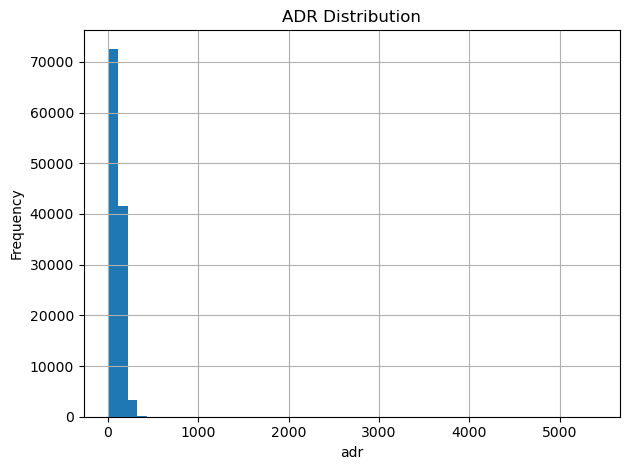


🧪 Sample Data:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0          7               2015               July   
2  Resort Hotel            0         13               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     1       1  ...      0.0   
2                        0                     1       1  ...      0.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0          

In [ ]:


# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\Thulani\Desktop\Thulani_data_cleaning\data\hotel_booking_cleaned_dataset.csv", parse_dates=["arrival_date"])

# 1. Check total record count
print("✅ Total records:", df.shape[0])

# 2. Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values.")
else:
    print("❌ Missing values found:\n", missing[missing > 0])

# 3. Check data type consistency
print("\n Data Types:\n", df.dtypes)

# Check 'arrival_date' is datetime
if pd.api.types.is_datetime64_any_dtype(df['arrival_date']):
    print("✅ 'arrival_date' is datetime.")
else:
    print("❌ 'arrival_date' is NOT in datetime format.")

# 4. Check for outliers in key numerical fields
outlier_checks = {
    'lead_time': (0, 600),
    'adr': (0, 1000),
    'stays_in_week_nights': (0, 50),
    'stays_in_weekend_nights': (0, 30),
    'adults': (1, 10),
    'children': (0, 10),
    'babies': (0, 5)
}

print("\n📉 Outlier Check Results:")
for col, (min_val, max_val) in outlier_checks.items():
    outliers = df[~df[col].between(min_val, max_val)]
    if not outliers.empty:
        print(f"❌ Outliers found in {col}: {len(outliers)} rows")
    else:
        print(f"✅ No outliers in {col}")

# 5. Optional: Visual check of ADR distribution
df['adr'].hist(bins=50)
plt.title('ADR Distribution')
plt.xlabel('adr')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Preview dataset
print("\n🧪 Sample Data:\n", df.head(3))
print("\n🔢 Summary Statistics:\n", df.describe(include='all').T)


In [ ]:
# Remove outliers from babies column (keep 0 to 5 inclusive)
df = df[df['babies'].between(0, 5)]


✅ Total records: 117548
✅ No missing values.

🧾 Data Types:
 hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved

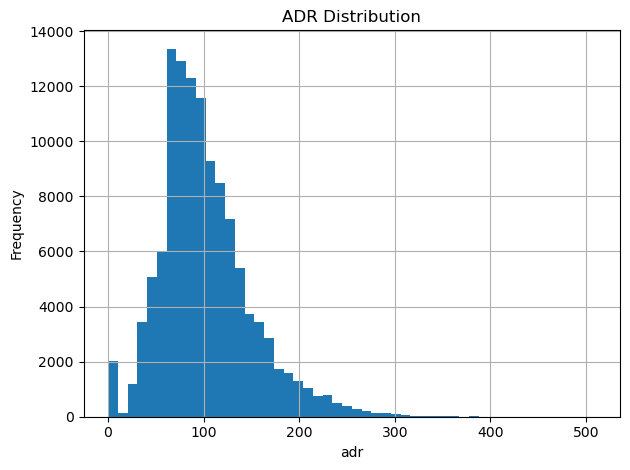


🧪 Sample Data:
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0          7               2015               July   
2  Resort Hotel            0         13               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                        0                     1       1  ...      0.0   
2                        0                     1       1  ...      0.0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0          

In [ ]:
# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\Thulani\Desktop\Thulani_data_cleaning\data\hotel_booking_cleaned_dataset.csv", parse_dates=["arrival_date"])

# 1. Check total record count
print("✅ Total records:", df.shape[0])

# 2. Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values.")
else:
    print("❌ Missing values found:\n", missing[missing > 0])

# 3. Check data type consistency
print("\n🧾 Data Types:\n", df.dtypes)

# Check 'arrival_date' is datetime
if pd.api.types.is_datetime64_any_dtype(df['arrival_date']):
    print("✅ 'arrival_date' is datetime.")
else:
    print("❌ 'arrival_date' is NOT in datetime format.")

# 4. Check for outliers in key numerical fields
outlier_checks = {
    'lead_time': (0, 600),
    'adr': (0, 1000),
    'stays_in_week_nights': (0, 50),
    'stays_in_weekend_nights': (0, 30),
    'adults': (1, 10),
    'children': (0, 10),
    'babies': (0, 5)
}
# Remove outliers from babies column (keep 0 to 5 inclusive)
df = df[df['babies'].between(0, 5)]
# Optional: domain-based cleaning
df = df[df['adr'] <= 5000]



print("\n📉 Outlier Check Results:")
for col, (min_val, max_val) in outlier_checks.items():
    outliers = df[~df[col].between(min_val, max_val)]
    if not outliers.empty:
        print(f"❌ Outliers found in {col}: {len(outliers)} rows")
    else:
        print(f"✅ No outliers in {col}")

# 5. Optional: Visual check of ADR distribution
df['adr'].hist(bins=50)
plt.title('ADR Distribution')
plt.xlabel('adr')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Preview dataset
print("\n🧪 Sample Data:\n", df.head(3))
print("\n🔢 Summary Statistics:\n", df.describe(include='all').T)
